# crime ~ cctv

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
!pip install folium

In [4]:
import requests
import json
import pandas as pd
import numpy as np
# from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.15.0


In [5]:
from matplotlib import rc

rc('font', family='AppleGothic')

In [7]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)
# seoul_map

In [13]:
crime_data = pd.read_csv("./concat_by_gu.csv")
# crime_data = state_data[state_data['city_name'] == '서울']

In [14]:
crime_data

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14
2,용산구,2967,5,7,280,978,1697,19036534.5,212173,101791,110382,32201,34894,1484,9960,23,7
3,성동구,2194,2,2,125,979,1086,16820149.0,277090,134390,142700,42096,44378,1255,215,15,9
4,광진구,3619,6,0,230,1670,1713,17062820.1,335335,161154,174181,54594,58908,3134,8971,15,10
5,동대문구,3253,4,2,125,1556,1566,14215912.2,340983,167230,173753,52342,53792,2620,10307,39,10
6,중랑구,3599,2,2,150,1508,1937,18497134.6,382284,187392,194892,53345,54355,3748,9330,28,8
7,성북구,2749,3,1,158,1143,1444,24577917.6,424916,203824,221092,58327,62017,3605,9982,34,9
8,강북구,2832,5,5,177,872,1773,23600408.1,287490,139141,148349,36477,36353,2757,9776,25,9
9,도봉구,2141,3,0,70,969,1099,20651010.0,306722,148670,158052,37896,37018,1395,6334,0,7


## 전체 범죄발생 현황

In [16]:
crime_data["not_sex_crime"] = crime_data["total_crime"] - crime_data["sex_crime"]
crime_data["not_sex_2030w"] = (crime_data["not_sex_crime"] / crime_data["women_2030"]) * 1000
crime_data["sex_2030w"] = (crime_data["sex_crime"] / crime_data["women_2030"]) * 1000
crime_data

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num,not_sex_crime,not_sex_2030w,sex_2030w
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18,2910,140.715667,11.025145
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14,2877,143.885971,9.702426
2,용산구,2967,5,7,280,978,1697,19036534.5,212173,101791,110382,32201,34894,1484,9960,23,7,2687,77.004643,8.024302
3,성동구,2194,2,2,125,979,1086,16820149.0,277090,134390,142700,42096,44378,1255,215,15,9,2069,46.622200,2.816711
4,광진구,3619,6,0,230,1670,1713,17062820.1,335335,161154,174181,54594,58908,3134,8971,15,10,3389,57.530386,3.904393
5,동대문구,3253,4,2,125,1556,1566,14215912.2,340983,167230,173753,52342,53792,2620,10307,39,10,3128,58.149911,2.323766
6,중랑구,3599,2,2,150,1508,1937,18497134.6,382284,187392,194892,53345,54355,3748,9330,28,8,3449,63.453224,2.759636
7,성북구,2749,3,1,158,1143,1444,24577917.6,424916,203824,221092,58327,62017,3605,9982,34,9,2591,41.778867,2.547689
8,강북구,2832,5,5,177,872,1773,23600408.1,287490,139141,148349,36477,36353,2757,9776,25,9,2655,73.033862,4.868924
9,도봉구,2141,3,0,70,969,1099,20651010.0,306722,148670,158052,37896,37018,1395,6334,0,7,2071,55.945756,1.890972


In [8]:
seoul_group_data = crime_data.groupby("county_name")["total_crime"].sum().sort_values(ascending=False)
seoul_group_data

county_name
강남구     6947
송파구     5167
관악구     4879
영등포구    4819
강서구     4663
서초구     4459
마포구     4096
노원구     3896
구로구     3857
강동구     3711
광진구     3619
중랑구     3599
은평구     3487
동대문구    3253
양천구     3169
종로구     3138
중구      3071
용산구     2967
강북구     2832
성북구     2749
동작구     2735
금천구     2577
서대문구    2374
성동구     2194
도봉구     2141
Name: total_crime, dtype: int64

Text(0.5, 1.0, '전체 범죄 건수')

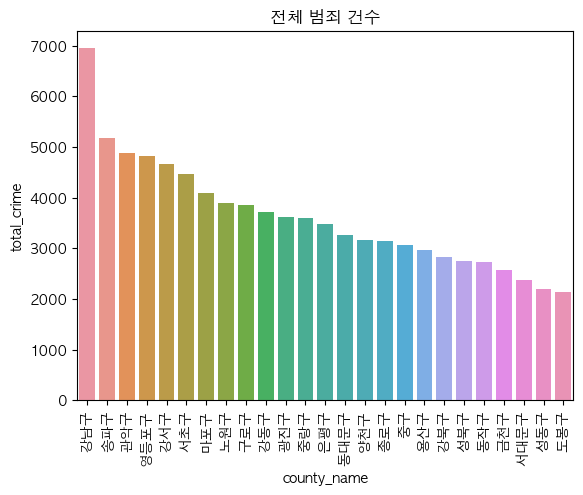

In [9]:
import numpy as np

# total_crime 열을 기준으로 내림차순 정렬한 인덱스 리스트 생성
order = crime_data.groupby('county_name')['total_crime'].sum().sort_values(ascending=False).index.tolist()

# plt.figure(figsize=(5, 8))
sns.barplot(
    data=crime_data,
    x="county_name",
    y="total_crime",
    order=order
)
plt.xticks(rotation=90)
plt.title("전체 범죄 건수")

### 행정구역 파일 로드

In [18]:
import json

geo_path = './skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [1]:
# geo_str

In [12]:
# m = folium.Map(
#     location=[37.559819, 126.963895],
#     zoom_start=10, 
#     # tiles='cartodbpositron'
# )

# folium.GeoJson(
#     geo_str,
#     name='county_name'
# ).add_to(m)

# m

In [25]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='county_name'
).add_to(m)

folium.Choropleth(
    geo_data=geo_str,
    data=crime_data,
    columns=["county_name", "not_sex_2030w"],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    key_on="feature.id",
    legend_name="2030인구대비 일반범죄 발생 건수"
).add_to(m)

m

## 인구 대비 전체 범죄현황

In [15]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./EDA/data/key.json")

In [16]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [17]:
pop_crime = '''
select
  crime.county_name,
  sum(pop.total) as pop,
  sum(crime.murder_crime) as murder,
  sum(crime.sex_crime) as sex,
  sum(crime.theft_crime) as theft,
  sum(murder_crime + sex_crime + theft_crime) as crime
FROM 
  `my-fantazip.fantazip.population_by_age` as pop
inner join
  `my-fantazip.fantazip.crime` as crime
on
  pop.county_name = crime.county_name
group by
  county_name
'''

In [18]:
pop_crime = client.query(pop_crime).to_dataframe()
pop_crime

,county_name,pop,murder,sex,theft,crime
0,중구,121322,70,13580,95550,109200
1,강남구,549154,168,9338,34930,44436
2,강동구,459389,45,1413,15048,16506
3,강북구,287490,20,708,3488,4216
4,강서구,562550,36,3132,23892,27060
5,관악구,481872,30,981,5898,6909
6,광진구,335335,42,1610,11690,13342
7,구로구,392311,110,2170,15650,17930
8,금천구,227457,6,381,3354,3741
9,노원구,497237,15,900,7520,8435


In [19]:
pop_crime = pd.read_csv("./concat_by_gu.csv")
pop_crime

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14
2,용산구,2967,5,7,280,978,1697,19036534.5,212173,101791,110382,32201,34894,1484,9960,23,7
3,성동구,2194,2,2,125,979,1086,16820149.0,277090,134390,142700,42096,44378,1255,215,15,9
4,광진구,3619,6,0,230,1670,1713,17062820.1,335335,161154,174181,54594,58908,3134,8971,15,10
5,동대문구,3253,4,2,125,1556,1566,14215912.2,340983,167230,173753,52342,53792,2620,10307,39,10
6,중랑구,3599,2,2,150,1508,1937,18497134.6,382284,187392,194892,53345,54355,3748,9330,28,8
7,성북구,2749,3,1,158,1143,1444,24577917.6,424916,203824,221092,58327,62017,3605,9982,34,9
8,강북구,2832,5,5,177,872,1773,23600408.1,287490,139141,148349,36477,36353,2757,9776,25,9
9,도봉구,2141,3,0,70,969,1099,20651010.0,306722,148670,158052,37896,37018,1395,6334,0,7


In [20]:
pop_crime["crime_per_pop"] = (pop_crime["murder_crime"] + pop_crime["sex_crime"] + pop_crime["violence_crime"]) / 3

In [22]:
pop_crime[["county_name", "crime_per_pop"]].sort_values(by="crime_per_pop", ascending=False)

,county_name,crime_per_pop
22,강남구,1480.333333
23,송파구,987.000000
20,관악구,968.000000
18,영등포구,915.666667
15,강서구,888.333333
13,마포구,881.000000
21,서초구,845.000000
10,노원구,796.333333
16,구로구,761.333333
6,중랑구,696.333333


Text(0.5, 1.0, '(살인, 성, 폭행범죄)발생 / 전체 인구')

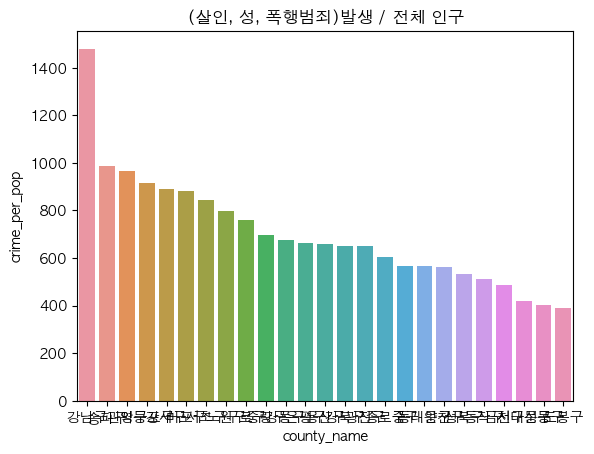

In [23]:
order = pop_crime.groupby('county_name')['crime_per_pop'].sum().sort_values(ascending=False).index.tolist()

# plt.figure(figsize=(5, 8))
sns.barplot(
    data=pop_crime,
    x="county_name",
    y="crime_per_pop",
    order=order
)
plt.title("(살인, 성, 폭행범죄)발생 / 전체 인구")

In [24]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='county_name'
).add_to(m)

folium.Choropleth(
    geo_data=geo_str,
    data=pop_crime,
    columns=["county_name", "crime_per_pop"],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    key_on="feature.id",
    # legend_name="전체 인구 대비 범죄()"
).add_to(m)

m

## 성범죄발생 현황

In [25]:
seoul_sex_crime = crime_data.groupby("county_name")["sex_crime"].sum().sort_values(ascending=False)
seoul_sex_crime

county_name
강남구     667
마포구     436
서초구     431
관악구     327
영등포구    327
송파구     290
용산구     280
강서구     261
광진구     230
종로구     228
구로구     217
동작구     212
중구      194
노원구     180
강북구     177
은평구     176
성북구     158
서대문구    157
강동구     157
중랑구     150
금천구     127
성동구     125
동대문구    125
양천구     114
도봉구      70
Name: sex_crime, dtype: int64

<Axes: xlabel='sex_crime', ylabel='county_name'>

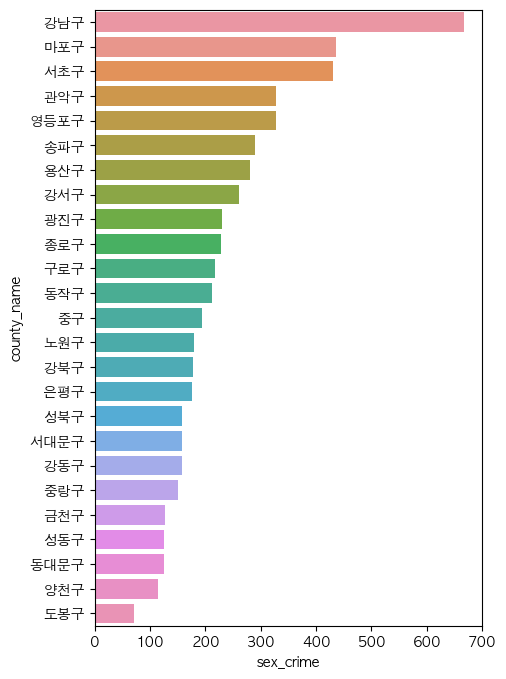

In [26]:
order = crime_data.groupby('county_name')['sex_crime'].sum().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(5, 8))
sns.barplot(
    data=crime_data,
    x="sex_crime",
    y="county_name",
    order=order
)

In [27]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='county_name'
).add_to(m)

folium.Choropleth(
    geo_data=geo_str,
    data=seoul_sex_crime,
    columns=["county_name", "sex_crime"],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    key_on="feature.id",
    legend_name="자치구별 성범죄건수"
).add_to(m)

m

## 인구 1000명당 범죄 발생 건수

In [28]:
crime = pd.read_csv("./concat_by_gu.csv")
crime.head(2)

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14


In [29]:
crime.head(2)

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14


In [30]:
crime = crime[["county_name", "total_crime", "pop_total", "murder_crime", "sex_crime", "violence_crime"]]

In [31]:
crime["crime_per_pop10001"] = (crime["total_crime"] / crime["pop_total"]) * 1000

In [32]:
crime.head(2)

,county_name,total_crime,pop_total,murder_crime,sex_crime,violence_crime,crime_per_pop10001
0,종로구,3138,137627,2,228,1587,22.800759
1,중구,3071,121322,1,194,1506,25.312804


In [33]:
crime["crime"] = crime["murder_crime"] + crime["sex_crime"] + crime["violence_crime"]

In [34]:
crime["crime_per_pop1000"] = (crime["crime"] / crime["pop_total"]) * 1000

In [35]:
crime.head(2)

,county_name,total_crime,pop_total,murder_crime,sex_crime,violence_crime,crime_per_pop10001,crime,crime_per_pop1000
0,종로구,3138,137627,2,228,1587,22.800759,1817,13.202351
1,중구,3071,121322,1,194,1506,25.312804,1701,14.020540


In [36]:
crime[['county_name', 'total_crime', 'pop_total', 'crime_per_pop10001']].sort_values(by="crime_per_pop10001", ascending=False)

,county_name,total_crime,pop_total,crime_per_pop10001
1,중구,3071,121322,25.312804
0,종로구,3138,137627,22.800759
2,용산구,2967,212173,13.983872
18,영등포구,4819,374985,12.851181
22,강남구,6947,549154,12.650368
17,금천구,2577,227457,11.329614
13,마포구,4096,362234,11.307608
21,서초구,4459,407768,10.935140
4,광진구,3619,335335,10.792193
20,관악구,4879,481872,10.125095


In [37]:
crime[['county_name', 'crime', 'pop_total', 'crime_per_pop1000']].sort_values(by="crime_per_pop1000", ascending=False)

,county_name,crime,pop_total,crime_per_pop1000
1,중구,1701,121322,14.020540
0,종로구,1817,137627,13.202351
2,용산구,1982,212173,9.341434
22,강남구,4441,549154,8.086985
18,영등포구,2747,374985,7.325626
13,마포구,2643,362234,7.296389
8,강북구,1955,287490,6.800237
17,금천구,1456,227457,6.401210
21,서초구,2535,407768,6.216770
20,관악구,2904,481872,6.026497


Text(0.5, 1.0, '1000명당 전체 범죄 발생 건수')

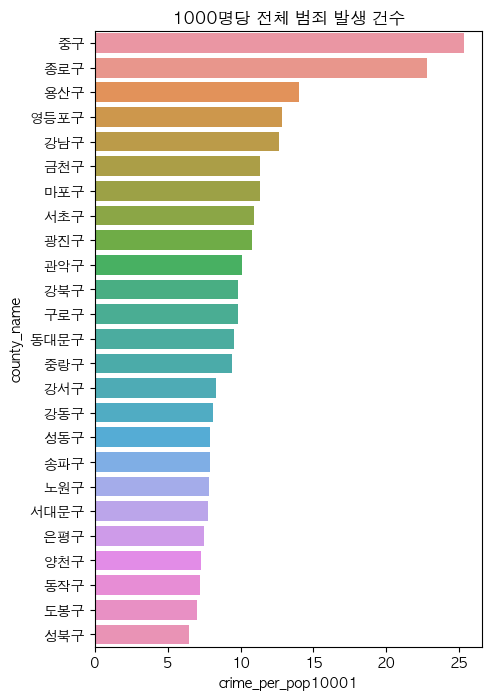

In [38]:
order = crime.groupby("county_name")["crime_per_pop10001"].sum().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(5, 8))
sns.barplot(
    data=crime,
    x="crime_per_pop10001",
    y="county_name",
    order=order
)
plt.title("1000명당 전체 범죄 발생 건수")

Text(0.5, 1.0, '1000명당 (살인, 성, 폭력)범죄 발생 건수')

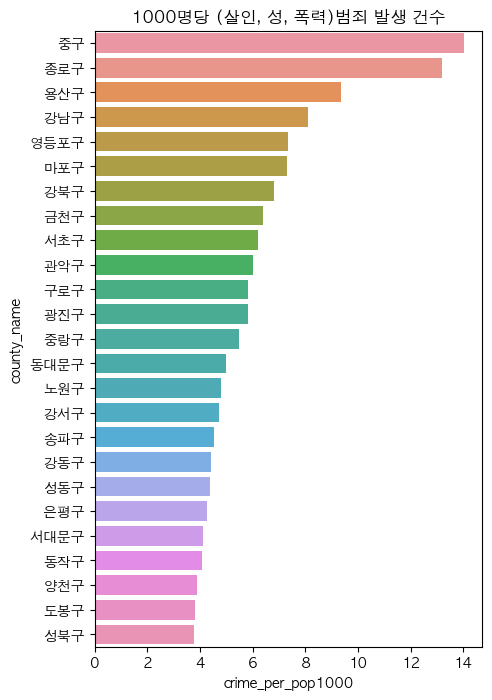

In [475]:
order = crime.groupby("county_name")["crime_per_pop1000"].sum().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(5, 8))
sns.barplot(
    data=crime,
    x="crime_per_pop1000",
    y="county_name",
    order=order
)
plt.title("1000명당 (살인, 성, 폭력)범죄 발생 건수")

In [482]:
crime

,county_name,total_crime,pop_total,murder_crime,sex_crime,violence_crime,crime_per_pop10001,crime,crime_per_pop1000
0,종로구,3138,137627,2,228,1587,22.800759,1817,13.202351
1,중구,3071,121322,1,194,1506,25.312804,1701,14.020540
2,용산구,2967,212173,5,280,1697,13.983872,1982,9.341434
3,성동구,2194,277090,2,125,1086,7.918005,1213,4.377639
4,광진구,3619,335335,6,230,1713,10.792193,1949,5.812098
5,동대문구,3253,340983,4,125,1566,9.540065,1695,4.970922
6,중랑구,3599,382284,2,150,1937,9.414467,2089,5.464524
7,성북구,2749,424916,3,158,1444,6.469514,1605,3.777217
8,강북구,2832,287490,5,177,1773,9.850777,1955,6.800237
9,도봉구,2141,306722,3,70,1099,6.980262,1172,3.821050


In [476]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='county_name'
).add_to(m)

folium.Choropleth(
    geo_data=geo_str,
    data=crime,
    columns=["county_name", "crime_per_pop1000"],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    key_on="feature.id",
    legend_name="자치구"
).add_to(m)

m

## 2030여성인구 1000명당 (성범죄 제외)범죄 발생

In [39]:
gu_data = pd.read_csv("./concat_by_gu.csv")
gu_data

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14
2,용산구,2967,5,7,280,978,1697,19036534.5,212173,101791,110382,32201,34894,1484,9960,23,7
3,성동구,2194,2,2,125,979,1086,16820149.0,277090,134390,142700,42096,44378,1255,215,15,9
4,광진구,3619,6,0,230,1670,1713,17062820.1,335335,161154,174181,54594,58908,3134,8971,15,10
5,동대문구,3253,4,2,125,1556,1566,14215912.2,340983,167230,173753,52342,53792,2620,10307,39,10
6,중랑구,3599,2,2,150,1508,1937,18497134.6,382284,187392,194892,53345,54355,3748,9330,28,8
7,성북구,2749,3,1,158,1143,1444,24577917.6,424916,203824,221092,58327,62017,3605,9982,34,9
8,강북구,2832,5,5,177,872,1773,23600408.1,287490,139141,148349,36477,36353,2757,9776,25,9
9,도봉구,2141,3,0,70,969,1099,20651010.0,306722,148670,158052,37896,37018,1395,6334,0,7


In [40]:
gu_data["not_sex_crime"] = gu_data["total_crime"] - gu_data["sex_crime"]
gu_data["not_sex_per_2030w"] = (gu_data["not_sex_crime"] / gu_data["women_2030"]) * 1000
gu_data["sex_per_2030w"] = (gu_data["sex_crime"] / gu_data["women_2030"]) * 1000

### 2030여성인구 1000명당 (성 범죄 제외)범죄 발생 건수

In [43]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='county_name'
).add_to(m)

folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=["county_name", "not_sex_per_2030w"],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    key_on="feature.id",
    legend_name="2030여성인구 1000명당 (성범죄 제외)범죄발생 건수"
).add_to(m)

m

### 2030여성인구 1000명당 성 범죄 발생 건수

In [45]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # tiles='cartodbpositron'
)

folium.GeoJson(
    geo_str,
    name='county_name'
).add_to(m)

folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=["county_name", "sex_per_2030w"],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    key_on="feature.id",
    legend_name="2030여성인구 1000명당 성 범죄발생 건수"
).add_to(m)

m

In [268]:
safe = pd.read_csv("./concat_by_gu.csv")
safe

,county_name,total_crime,murder_crime,robbery_crime,sex_crime,theft_crime,violence_crime,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,3138,2,8,228,1313,1587,22536925.8,137627,66452,71175,19544,20680,1608,8643,25,18
1,중구,3071,1,5,194,1365,1506,9759468.4,121322,58651,62671,18376,19995,2287,6064,25,14
2,용산구,2967,5,7,280,978,1697,19036534.5,212173,101791,110382,32201,34894,1484,9960,23,7
3,성동구,2194,2,2,125,979,1086,16820149.0,277090,134390,142700,42096,44378,1255,215,15,9
4,광진구,3619,6,0,230,1670,1713,17062820.1,335335,161154,174181,54594,58908,3134,8971,15,10
5,동대문구,3253,4,2,125,1556,1566,14215912.2,340983,167230,173753,52342,53792,2620,10307,39,10
6,중랑구,3599,2,2,150,1508,1937,18497134.6,382284,187392,194892,53345,54355,3748,9330,28,8
7,성북구,2749,3,1,158,1143,1444,24577917.6,424916,203824,221092,58327,62017,3605,9982,34,9
8,강북구,2832,5,5,177,872,1773,23600408.1,287490,139141,148349,36477,36353,2757,9776,25,9
9,도봉구,2141,3,0,70,969,1099,20651010.0,306722,148670,158052,37896,37018,1395,6334,0,7


In [296]:
safe_top = safe.groupby("county_name")[["cctv_num", "light_num", "house_num", "police_num", "pop_total", 
                                  "total_crime", "murder_crime", "sex_crime", "violence_crime"]].sum()
safe_top

,cctv_num,light_num,house_num,police_num,pop_total,total_crime,murder_crime,sex_crime,violence_crime
county_name,,,,,,,,,
강남구,6814,10210,112,14,549154,6947,12,667,3762
강동구,2541,7503,43,9,459389,3711,5,157,1872
강북구,2757,9776,25,9,287490,2832,5,177,1773
강서구,2431,8635,36,11,562528,4663,3,261,2401
관악구,4624,12401,53,9,481872,4879,10,327,2567
광진구,3134,8971,15,10,335335,3619,6,230,1713
구로구,4290,8015,31,8,392311,3857,11,217,2056
금천구,2400,6269,9,5,227457,2577,2,127,1327
노원구,1991,5288,27,8,497237,3896,3,180,2206


In [297]:
safe_top.corr()

,cctv_num,light_num,house_num,police_num,pop_total,total_crime,murder_crime,sex_crime,violence_crime
cctv_num,1.000000,0.509780,0.729874,0.183762,0.482425,0.710559,0.738029,0.587063,0.696590
light_num,0.509780,1.000000,0.391802,0.166076,0.081019,0.319608,0.466604,0.350258,0.316445
house_num,0.729874,0.391802,1.000000,0.425307,0.519316,0.820005,0.602627,0.783398,0.831722
police_num,0.183762,0.166076,0.425307,1.000000,-0.118067,0.360739,0.066302,0.380955,0.317491
pop_total,0.482425,0.081019,0.519316,-0.118067,1.000000,0.666608,0.287699,0.340859,0.654590
total_crime,0.710559,0.319608,0.820005,0.360739,0.666608,1.000000,0.532153,0.834530,0.980949
murder_crime,0.738029,0.466604,0.602627,0.066302,0.287699,0.532153,1.000000,0.485570,0.560113
sex_crime,0.587063,0.350258,0.783398,0.380955,0.340859,0.834530,0.485570,1.000000,0.824737
violence_crime,0.696590,0.316445,0.831722,0.317491,0.654590,0.980949,0.560113,0.824737,1.000000


Text(0.5, 1.0, '범죄 ~ 변수')

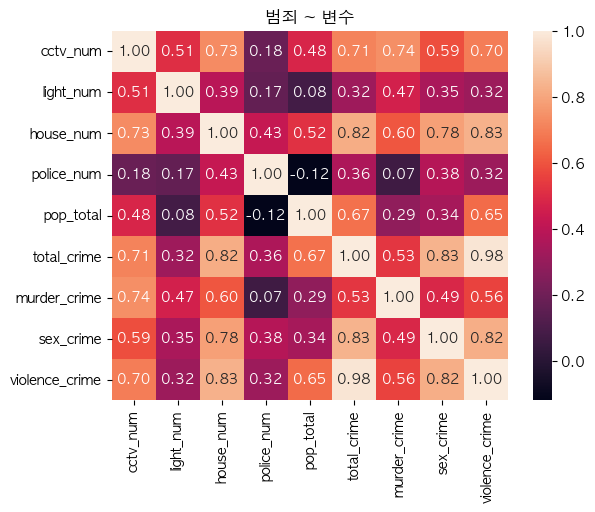

In [299]:
sns.heatmap(
    data=safe_top.corr(),
    annot=True,
    fmt=".2f"
)
plt.title("범죄 ~ 변수")

In [300]:
safe_df = safe[["county_name", "area"]]
safe_df.head(2)

,county_name,area
0,종로구,22536925.8
1,중구,9759468.4


In [301]:
# 'county_name'을 기준으로 inner join하여 concat
merged_df = pd.merge(safe_top, safe_df, on='county_name', how='inner')

In [302]:
merged_df

,county_name,cctv_num,light_num,house_num,police_num,pop_total,total_crime,murder_crime,sex_crime,violence_crime,area
0,강남구,6814,10210,112,14,549154,6947,12,667,3762,39497597.1
1,강동구,2541,7503,43,9,459389,3711,5,157,1872,24590382.7
2,강북구,2757,9776,25,9,287490,2832,5,177,1773,23600408.1
3,강서구,2431,8635,36,11,562528,4663,3,261,2401,33942883.4
4,관악구,4624,12401,53,9,481872,4879,10,327,2567,29568368.9
5,광진구,3134,8971,15,10,335335,3619,6,230,1713,17062820.1
6,구로구,4290,8015,31,8,392311,3857,11,217,2056,20122908.3
7,금천구,2400,6269,9,5,227457,2577,2,127,1327,13020527.6
8,노원구,1991,5288,27,8,497237,3896,3,180,2206,35439122.0
9,도봉구,1395,6334,0,7,306722,2141,3,70,1099,20651010.0


In [303]:
merged_df["house_per_pop"] = merged_df["house_num"] / merged_df["pop_total"]

In [305]:
merged_df["cctv_per_area"] = merged_df["cctv_num"] / merged_df["area"]
merged_df["light_per_area"] = merged_df["light_num"] / merged_df["area"]
merged_df["police_per_pop"] = merged_df["police_num"] / merged_df["pop_total"]

In [307]:
merged_df = merged_df.drop(["police_per_area"], axis=1)
merged_df

,county_name,cctv_num,light_num,house_num,police_num,pop_total,total_crime,murder_crime,sex_crime,violence_crime,area,house_per_pop,cctv_per_area,light_per_area,police_per_pop
0,강남구,6814,10210,112,14,549154,6947,12,667,3762,39497597.1,0.000204,0.000173,0.000258,0.000025
1,강동구,2541,7503,43,9,459389,3711,5,157,1872,24590382.7,0.000094,0.000103,0.000305,0.000020
2,강북구,2757,9776,25,9,287490,2832,5,177,1773,23600408.1,0.000087,0.000117,0.000414,0.000031
3,강서구,2431,8635,36,11,562528,4663,3,261,2401,33942883.4,0.000064,0.000072,0.000254,0.000020
4,관악구,4624,12401,53,9,481872,4879,10,327,2567,29568368.9,0.000110,0.000156,0.000419,0.000019
5,광진구,3134,8971,15,10,335335,3619,6,230,1713,17062820.1,0.000045,0.000184,0.000526,0.000030
6,구로구,4290,8015,31,8,392311,3857,11,217,2056,20122908.3,0.000079,0.000213,0.000398,0.000020
7,금천구,2400,6269,9,5,227457,2577,2,127,1327,13020527.6,0.000040,0.000184,0.000481,0.000022
8,노원구,1991,5288,27,8,497237,3896,3,180,2206,35439122.0,0.000054,0.000056,0.000149,0.000016
9,도봉구,1395,6334,0,7,306722,2141,3,70,1099,20651010.0,0.000000,0.000068,0.000307,0.000023


In [308]:
merged_df.columns

Index(['county_name', 'cctv_num', 'light_num', 'house_num', 'police_num',
       'pop_total', 'total_crime', 'murder_crime', 'sex_crime',
       'violence_crime', 'area', 'house_per_pop', 'cctv_per_area',
       'light_per_area', 'police_per_pop'],
      dtype='object')

In [309]:
merged_corr = merged_df[['cctv_num', 'light_num', 'house_num', 'police_num',
       'pop_total', 'total_crime', 'murder_crime', 'sex_crime',
       'violence_crime', 'area', 'house_per_pop', 'cctv_per_area',
       'light_per_area', 'police_per_pop']]

/Users/oyujeong/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '범죄 ~ 변수 비율')

/Users/oyujeong/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/oyujeong/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


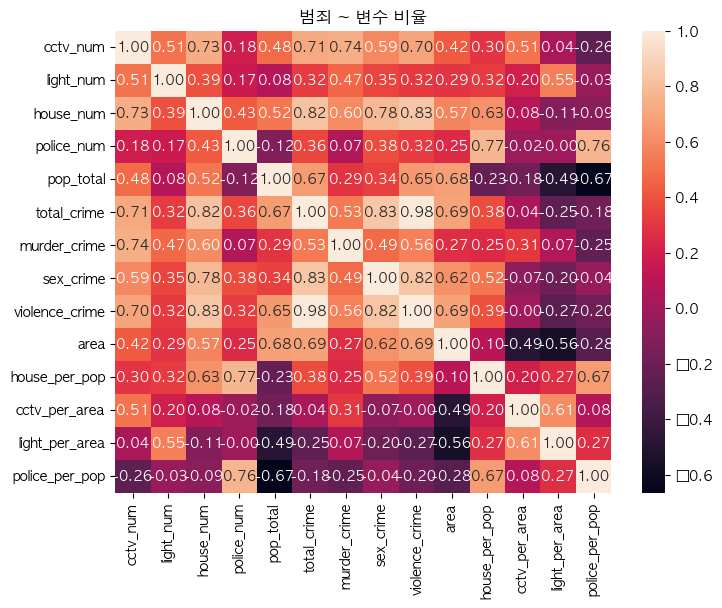

In [312]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=merged_corr.corr(),
    annot=True,
    fmt=".2f"
)
plt.title("범죄 ~ 변수 비율")

In [371]:
merged_df[merged_df["county_name"]=="강남구"][["total_crime", "murder_crime", "sex_crime", "violence_crime"]].mean()

total_crime       6947.0
murder_crime        12.0
sex_crime          667.0
violence_crime    3762.0
dtype: float64